In [14]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [15]:
fol = "ExpThreeCriteria/"

path = fol + "2023_08_19_21:17:40/result_1.json"




with open('../EvolutionaryFramework/results/NSGA_II/' + path) as user_file:
  parsed_json = json.load(user_file)
  
# print(json.dumps(parsed_json, indent = 4, sort_keys=True))

In [16]:
chordProgression = ""
melodyKeyValue = ""
melodyKeyType = ""
data = []
metaParameters = []
metaDictionary = {}
for elem in parsed_json:
    if elem == "metaParameters":
        metaDictionary = {
            'algorithmName': parsed_json[elem]["algorithmName"],
            'populationSize': parsed_json[elem]["populationSize"],
            'numberOfBars': parsed_json[elem]["numberOfBars"],
            'maxNumberOfNotes': parsed_json[elem]["maxNumberOfNotes"],
            'representationType': parsed_json[elem]["representationType"],
            'chordProgression': parsed_json[elem]["chordProgression"],
            'melodyKeyValue': parsed_json[elem]["melodyKeyValue"],
            'melodyKeyType': parsed_json[elem]["melodyKeyType"],
            'crossoverProbability': parsed_json[elem]["crossoverProbability"],
            'mutationProbability': parsed_json[elem]["mutationProbability"],
            'selectionType': parsed_json[elem]["selectionType"],
            'matingPoolSelectionType': parsed_json[elem]["matingPoolSelectionType"],
            'numberOfGenerations': parsed_json[elem]["numberOfGenerations"],
            'criteria': parsed_json[elem]["criteria"],
        }
        for key, value in parsed_json[elem]["weightsValues"].items():
            metaDictionary["weightsValues_" + key] = value
        for key, value in parsed_json[elem]["crossoverType"].items():
            metaDictionary["crossoverType_" + key] = value
        for key, value in parsed_json[elem]["mutationType"].items():
            metaDictionary["mutationType_" + key] = value

        chordProgression = parsed_json[elem]["chordProgression"]
        melodyKeyValue = parsed_json[elem]["melodyKeyValue"]
        melodyKeyType = parsed_json[elem]["melodyKeyType"]
metaParameters.append(metaDictionary)

metaParameters_df = pd.DataFrame(metaParameters)   


for elem in parsed_json:
        if elem == "experiment":
            for generation in parsed_json[elem]:
                if (generation != "qualityOfPopulation"):
                    for front in parsed_json[elem][generation]:
                        for individual in parsed_json[elem][generation][front]:
                            dictionary = {}
                            dictionary = {
                                'generation': generation,
                                'front': front,
                                'melody': individual['melody'],
                                'penalty': individual['penalty']
                            }
                            
                            for criterion in metaParameters_df['criteria'].values[0]:
                                dictionary[criterion] = individual['fitness'][criterion]
                            data.append(dictionary)
                else:
                    print(parsed_json[elem][generation])
data_df = pd.DataFrame(data)

1.3843105642668296


In [17]:
list_of_generations = []

for gen in data_df["generation"].unique():
    generation = data_df[data_df["generation"] == gen]
    front_elements = []
    front_data = generation[generation["front"] == "front_1"]


    for criterion in metaParameters_df['criteria'].values[0]:
        front_temp = []
        for i, individual in enumerate(front_data[criterion]):
            front_temp.append(individual)
        front_elements.append(front_temp)
    list_of_generations.append(front_elements)

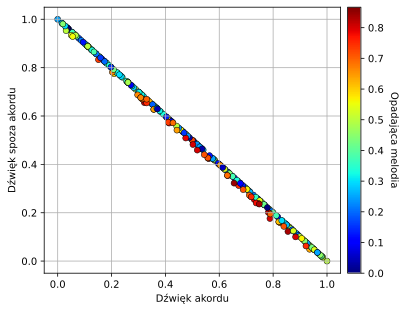

In [21]:
fig, ax = plt.subplots()
# ax.set_title("Pareto-optimal front for algorithm NSGA-II")
ax.set_ylabel("Dźwięk spoza akordu")
ax.set_xlabel("Dźwięk akordu")
ax.grid()

sc = ax.scatter(list_of_generations[-1][0], list_of_generations[-1][1], c=list_of_generations[-1][2],  cmap='Spectral', alpha=1.0, edgecolors='black',linewidths=0.5)

plt.autoscale(enable=True, axis='y')

# Add the colorscale reference on the right
cbar = plt.colorbar(sc, ax=ax, pad=0.02)
cbar.set_label('Opadająca melodia', rotation=-90, labelpad=15)
plt.show()



In [22]:
import plotly.graph_objects as go

# Extract data from list_of_generations
x = list_of_generations[-1][0]
y = list_of_generations[-1][1]
z = list_of_generations[-1][2]

# Create the scatter plot
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers', 
                                    marker=dict(size=5, color=z, 
                                                colorscale='Spectral', 
                                                opacity=0.8, 
                                                line=dict(width=0.5, color='black')))])

# Set axis labels
fig.update_layout(scene=dict(xaxis_title="Dźwięk akordu", yaxis_title="Dźwięk spoza akordu", zaxis_title="Opadająca melodia"))

# Set the dimensions of the plot
fig.update_layout(width=800, height=600)

# Add color scale bar
colorbar = go.Surface(
    z=[[0, 1]],
    colorscale='Spectral',
    showscale=True,
    colorbar=dict(title="Opadająca melodia", xanchor="left", titleside="right")
)
fig.add_trace(colorbar)

# Show the plot
fig.show()



In [20]:

fig.write_image("3d_scatter_plot.svg", format="svg")